In [1]:
from keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Function to rotate images
def rotate_images(images, degrees):
  return np.rot90(images, k=degrees // 90, axes=(1, 2))

# Function to create subsets with the specified number of samples
def create_subsets(images, labels, num_samples):
  indices = np.arange(images.shape[0])
  np.random.shuffle(indices)
  subset_indices = indices[:num_samples]
  return images[subset_indices], labels[subset_indices]

def preprocess_images(images):
    return images.reshape(images.shape[0], -1).astype('float32') / 255.0

# Number of samples per subset
num_samples_per_subset = 15000

# Create subsets
X_train_normal, y_train_normal = create_subsets(X_train.reshape(X_train.shape[0], -1), y_train, num_samples_per_subset)
X_train_rotated_90, y_train_rotated_90 = create_subsets(rotate_images(X_train, 90).reshape(X_train.shape[0], -1), y_train, num_samples_per_subset)
X_train_rotated_180, y_train_rotated_180 = create_subsets(rotate_images(X_train, 180).reshape(X_train.shape[0], -1), y_train, num_samples_per_subset)
X_train_rotated_270, y_train_rotated_270 = create_subsets(rotate_images(X_train, 270).reshape(X_train.shape[0], -1), y_train, num_samples_per_subset)

X_train_normal_flat = preprocess_images(X_train_normal)
X_train_rotated_90_flat = preprocess_images(X_train_rotated_90)
X_train_rotated_180_flat = preprocess_images(X_train_rotated_180)
X_train_rotated_270_flat = preprocess_images(X_train_rotated_270)

# Verify shapes
print("Normal Images Shape:", X_train_normal_flat.shape)
print("Rotated 90 Degrees Images Shape:", X_train_rotated_90.shape)
print("Rotated 180 Degrees Images Shape:", X_train_rotated_180.shape)
print("Rotated 270 Degrees Images Shape:", X_train_rotated_270.shape)


Normal Images Shape: (15000, 784)
Rotated 90 Degrees Images Shape: (15000, 784)
Rotated 180 Degrees Images Shape: (15000, 784)
Rotated 270 Degrees Images Shape: (15000, 784)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
def train_svm(X_train, y_train, X_test, y_test):
  model = SVC(C = 10.0, kernel = 'rbf', gamma = 'scale', probability = True,verbose = True)
  model.fit(X_train, y_train)
  # X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')/255
  # y_pred = model.predict(X_test)
  # accuracy = accuracy_score(y_test, y_pred)
  # balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  return model

In [3]:
svm_normal = train_svm(X_train_normal_flat, y_train_normal, X_test, y_test)

[LibSVM]

In [4]:
svm_90 = train_svm(X_train_rotated_90_flat, y_train_rotated_90, X_test, y_test)

[LibSVM]

In [5]:
svm_180 = train_svm(X_train_rotated_180_flat, y_train_rotated_180, X_test, y_test)

[LibSVM]

In [6]:
svm_270 = train_svm(X_train_rotated_270_flat, y_train_rotated_270, X_test, y_test)

[LibSVM]

In [7]:
model = SVC(C = 10.0, kernel = 'rbf', gamma = 'scale', verbose = True)
model.fit(X_train_rotated_180_flat, y_train_rotated_180)

[LibSVM]

SVC(C=10.0, verbose=True)

In [8]:
def rotate_images_180(images):
    return np.rot90(images, k=2, axes=(0, 1))

rotated_X_test = rotate_images_180(X_test.reshape(X_test.shape[0], -1).astype('float32')/255)

In [9]:
def rotate_images(images, degrees):
  return np.rot90(images, k=degrees // 90, axes=(1, 2))

# Function to create a single test set with a specified rotation degree
def create_single_test_set(X_test, rotation_degree):
  if rotation_degree != 0:
    rotated_X_test = rotate_images(X_test, rotation_degree)
    return rotated_X_test.reshape(X_test.shape[0], -1).astype('float32')/255.0
  else:
    return X_test.reshape(X_test.shape[0], -1).astype('float32')/255.0

# Rotation degree for the test set (choose 90, 180, or 270)
# rotation_degree = 90

# # Create a single rotated test set
# X_test_rotated = create_single_test_set(X_test, rotation_degree)


In [10]:
# pred_normal = svm_normal.predict(X_test_rotated)

In [11]:
# accuracy_score(y_test, pred_normal)

In [12]:
# pred_normal

0.9736 0.9732712308024641
[7 2 1 ... 4 5 6]


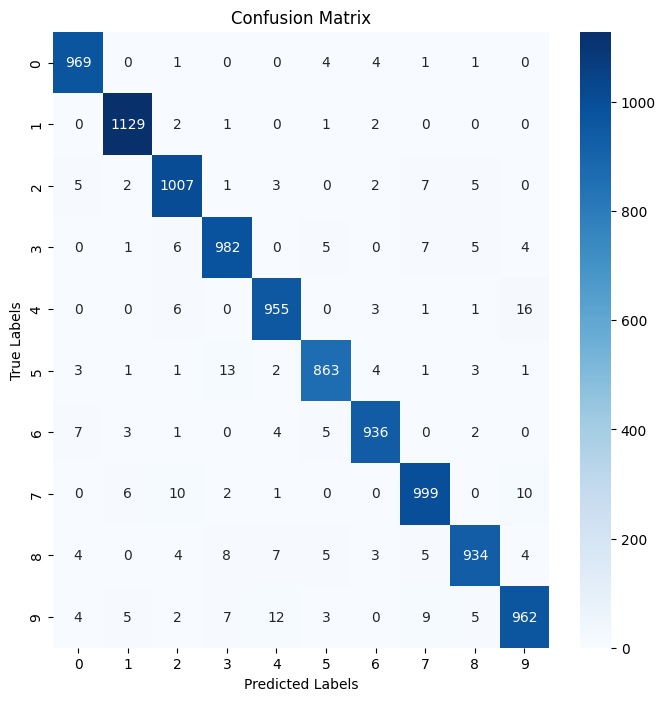

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score


X_test_normal = create_single_test_set(X_test, 0)
pred_normal = svm_normal.predict(X_test_normal)
print(accuracy_score(y_test, pred_normal), balanced_accuracy_score(y_test, pred_normal))
print(pred_normal)

cm = confusion_matrix(y_test, pred_normal)
classes = unique_labels(y_test, pred_normal)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

0.9743 0.9739790260102517
[7 2 1 ... 4 5 6]


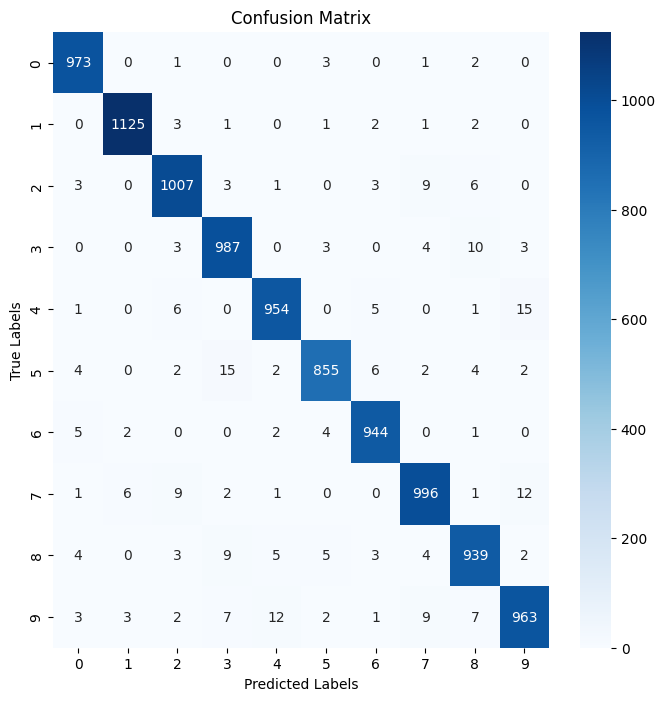

In [14]:
X_test_90 = create_single_test_set(X_test, 90)
pred_90 = svm_90.predict(X_test_90)
print(accuracy_score(y_test, pred_90), balanced_accuracy_score(y_test, pred_90))
print(pred_90)

cm = confusion_matrix(y_test, pred_90)
classes = unique_labels(y_test, pred_90)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

0.9732 0.9729148464588551
[7 2 1 ... 4 5 6]


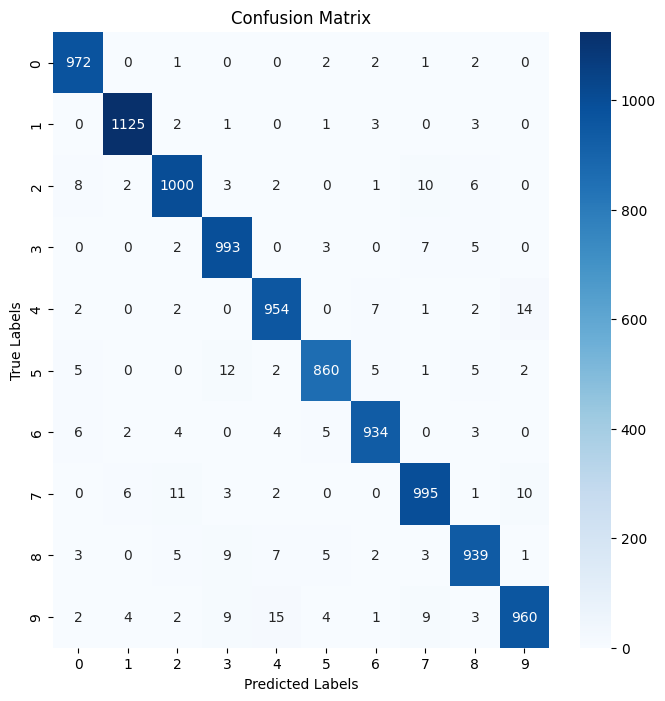

In [15]:
X_test_180 = create_single_test_set(X_test, 180)
pred_180 = svm_180.predict(X_test_180)
print(accuracy_score(y_test, pred_180), balanced_accuracy_score(y_test, pred_180))
print(pred_180)

cm = confusion_matrix(y_test, pred_180)
classes = unique_labels(y_test, pred_180)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

0.9725 0.9722691286989095
[7 2 1 ... 4 5 6]


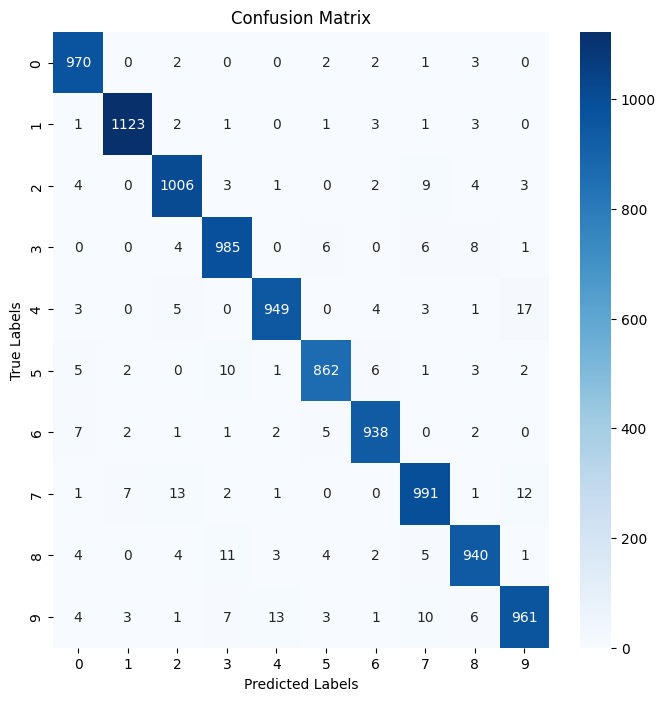

In [16]:
X_test_270 = create_single_test_set(X_test, 270)
pred_270 = svm_270.predict(X_test_270)
print(accuracy_score(y_test, pred_270), balanced_accuracy_score(y_test, pred_270))
print(pred_270)

cm = confusion_matrix(y_test, pred_270)
classes = unique_labels(y_test, pred_270)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
# X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')/255
# svm_180_pred = model.predict(X_test_rotated)

In [18]:
# accuracy_score(y_test, svm_180_pred)

In [19]:
# balanced_accuracy_score(y_test, svm_180_pred)

In [20]:
# from sklearn.metrics import confusion_matrix
# from sklearn.utils.multiclass import unique_labels

# cm = confusion_matrix(y_test, svm_180_pred)
# classes = unique_labels(y_test, svm_180_pred)

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [22]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# import pyheif
# image_path = '/content/gdrive/My Drive/SML Project Images/sample_6.heic'
# heif_file = pyheif.read(image_path)
# image = Image.frombytes(
#     heif_file.mode,
#     heif_file.size,
#     heif_file.data,
#     "raw",
#     heif_file.mode,
#     heif_file.stride,
# )

# image = image.convert("L")
# # image = image.rotate(180)
# image = image.resize((28,28))
# temp = np.array(image).reshape(1,-1).astype('float32')/255

In [102]:
### Trying out on an Image from Local System
from PIL import Image

image_path = '/content/gdrive/My Drive/SML Project Images/temp_photo.jpg'
image = Image.open(image_path)

image = image.convert("L")
# image = image.rotate(90)
image = image.resize((28,28))
temp = np.array(image).reshape(1,-1).astype('float32')/255

In [103]:
image

In [104]:
print("Normal: ", svm_normal.predict(temp), "90: ", svm_90.predict(temp), "180: ", svm_180.predict(temp), "270: ", svm_270.predict(temp))

Normal:  [1] 90:  [4] 180:  [5] 270:  [7]


In [105]:
print(svm_normal.predict_proba(temp).mean(),svm_90.predict_proba(temp).mean(),svm_180.predict_proba(temp).mean(),svm_270.predict_proba(temp).mean())

0.09999999999999992 0.10000000000000006 0.10000000000000006 0.10000000000000002


In [106]:
print(svm_normal.decision_function(temp).mean(),svm_90.decision_function(temp).mean(),svm_180.decision_function(temp).mean(),svm_270.decision_function(temp).mean())

4.5011762755362765 4.536287186909383 4.528439992955854 4.463330123327323


In [26]:
svm_normal.predict(temp)

array([1], dtype=uint8)

In [27]:
svm_90.predict(temp)

array([4], dtype=uint8)

In [28]:
svm_180.predict(temp)

array([5], dtype=uint8)

In [29]:
svm_270.predict(temp)

array([7], dtype=uint8)

In [30]:
model.predict(temp)

array([5], dtype=uint8)

In [31]:
28*28*3

2352

In [32]:
3136/784

4.0

In [63]:
image

In [62]:
print(svm_normal.predict_proba(temp).mean(),svm_90.predict_proba(temp).mean(),svm_180.predict_proba(temp).mean(),svm_270.predict_proba(temp).mean())

0.09999999999999995 0.10000000000000005 0.09999999999999994 0.09999999999999999


In [114]:
print(svm_normal.decision_function(temp).mean(),svm_90.decision_function(temp).mean(),svm_180.decision_function(temp).mean(),svm_270.decision_function(temp).mean())

4.5011762755362765 4.536287186909383 4.528439992955854 4.463330123327323


In [35]:
# from keras.datasets import mnist
# import numpy as np

# # Load the MNIST dataset
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# # Function to rotate images
# def rotate_images(images, degrees):
#     return np.rot90(images, k=degrees // 90, axes=(1, 2))

# # Function to create subsets with the specified number of samples
# def create_subsets(images, labels, num_samples_per_subset):
#     indices = np.arange(images.shape[0])
#     np.random.shuffle(indices)
#     subset_indices = indices[:num_samples_per_subset]
#     return images[subset_indices], labels[subset_indices]

# # Create subsets
# X_train_normal, y_train_normal = create_subsets(X_train, y_train, 3000)
# X_train_rotated_90, y_train_rotated_90 = create_subsets(rotate_images(X_train, 90), y_train, 19000)
# X_train_rotated_180, y_train_rotated_180 = create_subsets(rotate_images(X_train, 180), y_train, 19000)
# X_train_rotated_270, y_train_rotated_270 = create_subsets(rotate_images(X_train, 270), y_train, 19000)

# # Concatenate all subsets into a single training set
# X_train_combined = np.concatenate([X_train_normal, X_train_rotated_90, X_train_rotated_180, X_train_rotated_270])
# y_train_combined = np.concatenate([y_train_normal, y_train_rotated_90, y_train_rotated_180, y_train_rotated_270])

# # Shuffle the combined training set
# shuffle_indices = np.arange(X_train_combined.shape[0])
# np.random.shuffle(shuffle_indices)

# X_train = X_train_combined[shuffle_indices]
# y_train = y_train_combined[shuffle_indices]

# # Print the shape of the combined training set
# print("Shape of X_train_combined:", X_train.shape)
# print("Shape of y_train_combined:", y_train.shape)


In [36]:
# X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
# X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

In [85]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[('svm_normal', svm_normal), ('svm_90', svm_90), ('svm_180', svm_180), ('svm_270', svm_270)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

In [110]:
X_train_combined = np.concatenate([X_train_normal_flat, X_train_rotated_90_flat, X_train_rotated_180_flat, X_train_rotated_270_flat])
y_train_combined = np.concatenate([y_train_normal, y_train_rotated_90, y_train_rotated_180, y_train_rotated_270])

In [112]:
model_2 = SVC(C=10.0, kernel="rbf", gamma="scale", probability=True, verbose=True)
model_2.fit(X_train_combined,y_train_combined)

[LibSVM]

SVC(C=10.0, probability=True, verbose=True)

In [113]:
model_2.predict(temp)

array([1], dtype=uint8)

In [249]:
### Trying out on an Image from Local System
from PIL import Image

image_path = '/content/gdrive/My Drive/SML Project Images/Smiley_Input.jpg'
image = Image.open(image_path)

image = image.convert("L")
# image = image.rotate(180)
image = image.resize((28,28))

temp = np.array(image).reshape(1,-1).astype('float32')/255
print(model_2.predict(temp))
image

[2]


Text(0.5, 1.0, 'Grayscale Image')

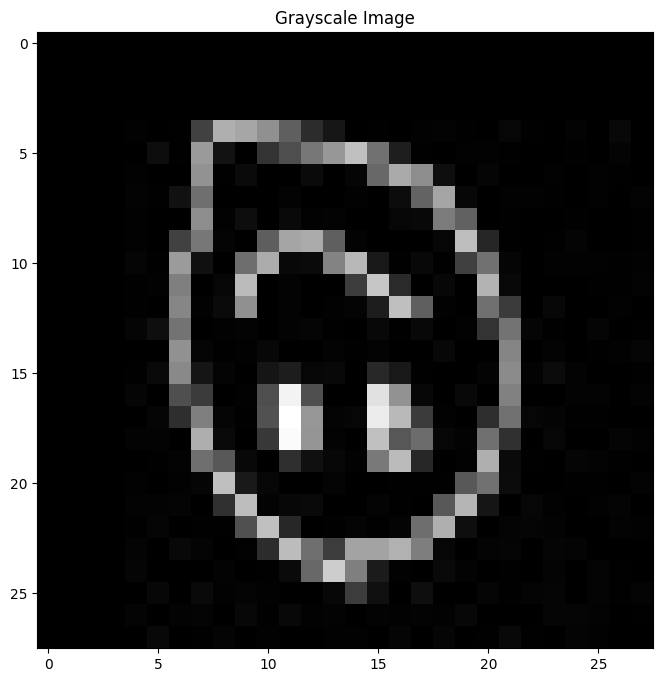

In [248]:
fig = plt.figure(figsize=(8, 8))  # Adjust the values (width, height) based on your preference

# Plot the grayscale image
plt.imshow(image, cmap='gray')  # 'gray' is the grayscale colormap; adjust vmin and vmax based on your image data
# plt.colorbar()  # Add a colorbar for reference
plt.title('Grayscale Image')


In [209]:
model_2.predict(temp)[0]

1

In [204]:
image

In [175]:
import pandas as pd
df = pd.DataFrame()

0.9736 0.9732712308024641
[7 2 1 ... 4 5 6]


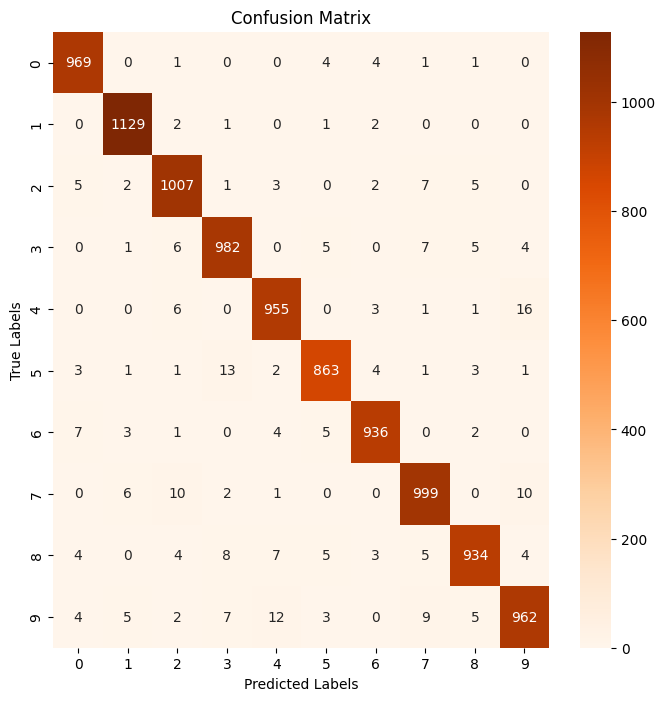

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score


X_test_model_2 = create_single_test_set(X_test, 0)
pred_model_2 = svm_normal.predict(X_test_model_2)
print(accuracy_score(y_test, pred_model_2), balanced_accuracy_score(y_test, pred_model_2))
print(pred_normal)

cm = confusion_matrix(y_test, pred_model_2)
classes = unique_labels(y_test, pred_model_2)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [177]:
df['Normal'] = pred_model_2

0.1231 0.1251098187828808
[0 4 4 ... 2 6 4]


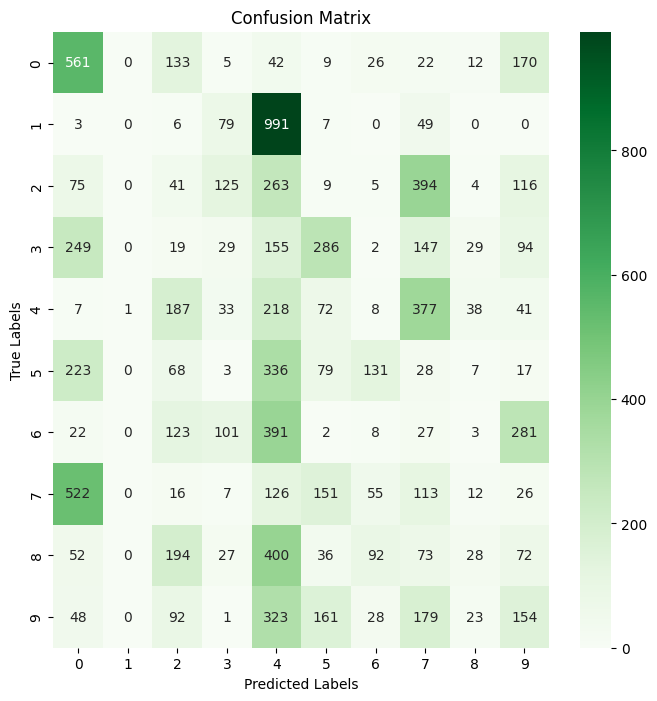

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score


X_test_model_2 = create_single_test_set(X_test, 90)
pred_model_2 = svm_normal.predict(X_test_model_2)
print(accuracy_score(y_test, pred_model_2), balanced_accuracy_score(y_test, pred_model_2))
print(pred_model_2)

cm = confusion_matrix(y_test, pred_model_2)
classes = unique_labels(y_test, pred_model_2)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [180]:
df['Rotated_90'] = pred_model_2

0.2734 0.266035231382561
[6 2 1 ... 4 2 7]


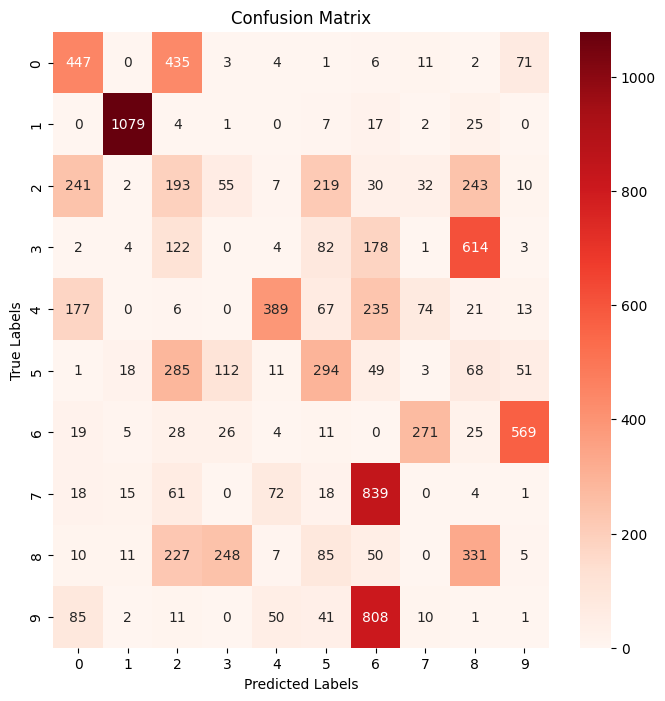

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score


X_test_model_2 = create_single_test_set(X_test, 180)
pred_model_2 = svm_normal.predict(X_test_model_2)
print(accuracy_score(y_test, pred_model_2), balanced_accuracy_score(y_test, pred_model_2))
print(pred_model_2)

cm = confusion_matrix(y_test, pred_model_2)
classes = unique_labels(y_test, pred_model_2)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [182]:
df['Rotated_180'] = pred_model_2

0.1395 0.14244548148683187
[4 0 4 ... 4 9 0]


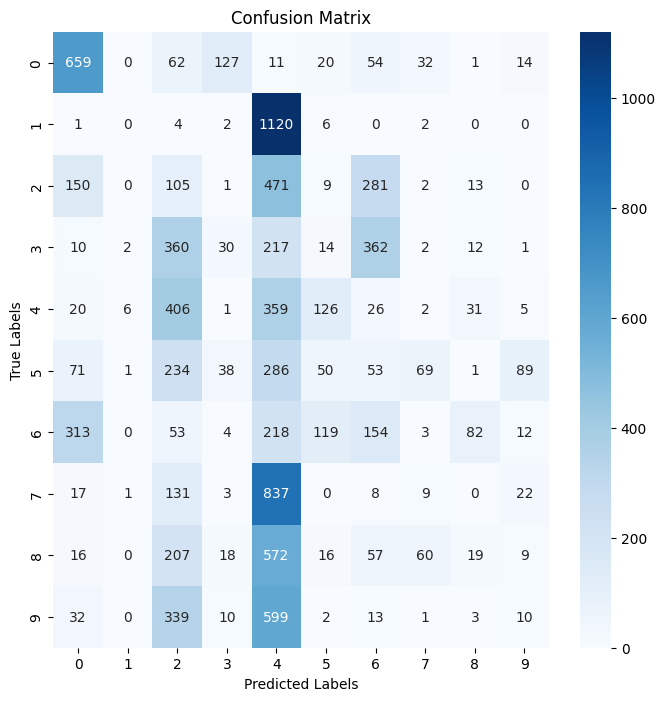

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score


X_test_model_2 = create_single_test_set(X_test, 270)
pred_model_2 = svm_normal.predict(X_test_model_2)
print(accuracy_score(y_test, pred_model_2), balanced_accuracy_score(y_test, pred_model_2))
print(pred_model_2)

cm = confusion_matrix(y_test, pred_model_2)
classes = unique_labels(y_test, pred_model_2)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [184]:
df['Rotated_270'] = pred_model_2

In [185]:
df['True_Label'] = y_test

In [187]:
df.to_csv('/content/gdrive/My Drive/SML Project Images/SVM_Rotation_Results.csv',header=True,index=True,encoding="utf-8")

In [233]:
len(model_2.support_vectors_)

23825

In [235]:
es = accuracy_score(y_test, pred_model_2)

# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_test))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.9704576951378964, 0.9767423048621037)
